# 构建你的第一个AI项目
<div class="alert alert-block alert-success">  
 <b>Version:</b> v0.1 <b>Date:</b> 2020-06-09
  
在本课程中，我们将着手构建一个端到端的人工智能项目，回顾前述课程学习的内容，通过动手实践来强化对相关概念和知识的认识及了解。 
希望对你未来的工作会有所帮助。
</div>


<div class="alert alert-block alert-info">
<b>💡:</b> 

- 预计时间： 2小时-3小时；
- 技能要求：基本的编程知识；  
- 前期准备：人工智能实训平台 + 可以连接网络的浏览器
</div>

### 本文档中相关注释说明

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

蓝色给大家一些新的提示要点，可以进行拓展操作.
</div>

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

这部分会对学过的知识进行关联和回顾，便于大家进行巩固.  
</div>

<div class="alert alert-block alert-success">  
概要✅：

绿色部分为章节内容核心点，提醒关注。  
</div>

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
红色标识了重点注意事项，提醒大家注意.   
</div>

## Step 00. 项目背景

<div class="alert alert-block alert-success">  
概要✅：

- 假设你所在公司受一个动物保护协会委托，要为他们开发一款软件，用来通过部署在自然保护区的监控摄像头捕获照片，并利用人工智能算法自动识别图像中的动物类型。通过构建这样一套监控系统，有助于他们快速统计相关珍惜动物的生活习性及繁殖情况，有利于提前对濒临灭绝的珍稀物种进行必要的援助。
    
- 为了评估这件事情的可行性，我们通过一个课程实验重点关注这套系统中人工智能识别部分的可行性。在PoC阶段，为了降低问题的复杂性，我们将选取几种容易获取的物种照片，通过检索引擎快速搜索图片，构建原型模型。
</div>

<center class="half">
    <img src="imgs/181.gif" width="230"/><img src="imgs/218.gif" width="230"/><img src="imgs/246.gif" width="230"/><img src="imgs/340.gif" width="230"/>
</center>

### 实验中使用的工具说明

In [2]:
from utils import *
from fastai2.vision.widgets import *

> TO-DO： fastai的简单介绍内容

### 人工智能项目构建流程回顾

![](imgs/arch.jpg)

## Step 01. 问题定义与描述

<div class="alert alert-block alert-danger">  
<b>重要📌</b>

- 问题： 自然场景下的图像分类问题；
- 输入：一张带🐕图像；
- 输出： 图像中🐕的类型；

</div>

<div class="alert alert-block alert-info">
<b>💡:</b> 

- 为了简化问题，我们忽略了图像中没有狗、同时有多只狗等复杂的场景，试想一下如果遇到这种复杂问题我们该如何解决？
    
- We also suggest that you iterate from end to end in your project; that is, don't spend months fine-tuning your model, or polishing the perfect GUI, or labelling the perfect dataset… Instead, complete every step as well as you can in a reasonable amount of time, all the way to the end. For instance, if your final goal is an application that runs on a mobile phone, then that should be what you have after each iteration. But perhaps in the early iterations you take some shortcuts, for instance by doing all of the processing on a remote server, and using a simple responsive web application. By completing the project end to end, you will see where the trickiest bits are, and which bits make the biggest difference to the final result.
    
- 问题抽象的重要性！
</div>

## Step 02. 数据准备

### 使用接口服务，快速获取数据

<div class="alert alert-block alert-success">  
概要✅：

注册Bing的搜索Key： https://azure.microsoft.com/en-us/try/cognitive-services/?api=bing-image-search-api 
</div>

> TO-DO: 增加一个注册bing search key的说明，比较简单

In [28]:
key = 'c8f22ec4655746abba511c2b4972617a'

In [12]:
search_images_bing??

Signature: search_images_bing(key, term, min_sz=128)
Docstring: <no docstring>
Source:   
def search_images_bing(key, term, min_sz=128):
    client = api('https://api.cognitive.microsoft.com', auth(key))
    return L(client.images.search(query=term, count=150, min_height=min_sz, min_width=min_sz).value)
File:      ~/gaoc/notebooks/1.Courses/fastbook/saved/utils.py
Type:      function


In [82]:
results = search_images_bing(key, 'Teddy Dog')
ims = results.attrgot('content_url')
len(ims)

89

In [83]:
ims

(#89) ['https://thehappypuppysite.com/wp-content/uploads/2017/12/teddy-bear-dog.jpg','https://thehappypuppysite.com/wp-content/uploads/2017/12/zuchon.jpg','https://dogsnet.com/wp-content/uploads/2019/03/teddy-dog.jpg','https://thehappypuppysite.com/wp-content/uploads/2017/12/cavapoo.jpg','https://thehappypuppysite.com/wp-content/uploads/2017/12/maltipoo.jpg','https://thehappypuppysite.com/wp-content/uploads/2017/12/teddy-bear.jpg','https://thehappypuppysite.com/wp-content/uploads/2017/12/morkie.jpg','http://www.petsworld.in/blog/wp-content/uploads/2015/02/teddy31.jpg','https://thehappypuppysite.com/wp-content/uploads/2017/12/puppy-1-1.jpg','https://pixfeeds.com/images/dogs/1280-674293142-bed-of-iniquity-to-poodle.jpg'...]

In [84]:
dest = 'Teddy_Dog.jpg'
download_url(ims[1], dest)

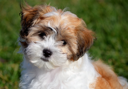

In [85]:
im = Image.open(dest)
im.to_thumb(128,128)

### 获得三种类别不同品种的狗狗

此处选择三种我可以辨认的狗狗，便于测试，你们可以根据喜好选择自己的。

In [65]:
dog_types = '京巴犬','泰迪犬','柯基犬'

In [5]:
path = Path('dogs')

In [67]:
if not path.exists():
    path.mkdir()
    for o in dog_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, o)
        download_images(dest, urls=results.attrgot('content_url'))


 Download of http://img14.3lian.com/201507/04/d2e2db74cd637d82df5fc451ffe7c72a.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p dogs/京巴犬
$ cd dogs/京巴犬
$ wget -c http://img14.3lian.com/201507/04/d2e2db74cd637d82df5fc451ffe7c72a.jpg
$ tar xf d2e2db74cd637d82df5fc451ffe7c72a.jpg
 And re-run your code once the download is successful




 Download of http://img17.3lian.com/d/file/201702/23/eb7b7f99617c37691db146680e6216ef.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p dogs/柯基犬
$ cd dogs/柯基犬
$ wget -c http://img17.3lian.com/d/file/201702/23/eb7b7f99617c37691db146680e6216ef.jpg
$ tar xf eb7b7f99617c37691db146680e6216ef.jpg
 And re-run your code once the download is successful


 Download of http://img17.3lian.com/d/file/201703/10/b2a00118157f1d12e80c902b91cb49a1.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p dogs/柯基犬
$ cd dogs/柯基犬
$ wget -c http://img17.3lian.com/d/file/201703/10/b2a00118157f1d12e80c902b91cb49a1.jpg
$ tar xf b2a00118157f1d12e80c902b91cb49a1.jpg
 And re-run your code once the download is successful


 Download of http://img14.3lian.com/201511/03/07e037dda900d907edac8b209688ee32.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p dogs/柯基犬
$ cd dogs/柯基犬
$ wget -c http://img14.3lian.com/201511/03/07e037dda900d907edac8b209688ee32.jpg
$ tar xf 07

> 由于下载过程需要一些时间，此处可以和大家聊聊无法下载的图像的处理策略以及其它的方法来快速获得所需要的数据。

In [68]:
path.ls()

(#3) [Path('dogs/泰迪犬'),Path('dogs/京巴犬'),Path('dogs/柯基犬')]

In [69]:
images = get_image_files(path)
images

(#418) [Path('dogs/泰迪犬/00000135.jpg'),Path('dogs/泰迪犬/00000007.jpg'),Path('dogs/泰迪犬/00000127.jpg'),Path('dogs/泰迪犬/00000028.jpg'),Path('dogs/泰迪犬/00000046.jpg'),Path('dogs/泰迪犬/00000085.jpg'),Path('dogs/泰迪犬/00000128.jpg'),Path('dogs/泰迪犬/00000055.jpg'),Path('dogs/泰迪犬/00000090.jpg'),Path('dogs/泰迪犬/00000139.jpg')...]

### 数据清理

下载下来的图片，格式（jpeg、png、gift等）、大小都不一致，需要进行一波清理，fast.ai提供了一个verify_images的工具，可以对图像进行基本的清理操作：

> verify_images 是一个很有用的函数，会查看该图片是否损坏、是否使用合适的channel数目，是否需要调整到指定大小或超过了限定大小

In [70]:
failed = verify_images(images)
failed

(#31) [Path('dogs/泰迪犬/00000126.jpg'),Path('dogs/泰迪犬/00000026.jpg'),Path('dogs/泰迪犬/00000111.jpg'),Path('dogs/泰迪犬/00000032.jpg'),Path('dogs/泰迪犬/00000120.jpg'),Path('dogs/泰迪犬/00000080.jpg'),Path('dogs/泰迪犬/00000043.jpg'),Path('dogs/泰迪犬/00000009.jpg'),Path('dogs/泰迪犬/00000013.jpg'),Path('dogs/京巴犬/00000135.jpg')...]

To remove all the failed images, you can use unlink on each of them. Note that, like most fastai functions that return a collection, verify_images returns an object of type L, which includes the map method. This calls the passed function on each element of the collection:

In [71]:
failed.map(Path.unlink);

In [6]:
data = DataBlock(
        blocks=(ImageBlock, CategoryBlock), #输入 与 输出
        get_items=get_image_files, # 数据哪里来
        splitter=RandomSplitter(valid_pct=0.2, seed=42), # 如何切分数据集
        get_y=parent_label, # 如何标记数据
        item_tfms=Resize(128)) # 如何进行数据预处理

In [7]:
dogs = data.dataloaders(path)

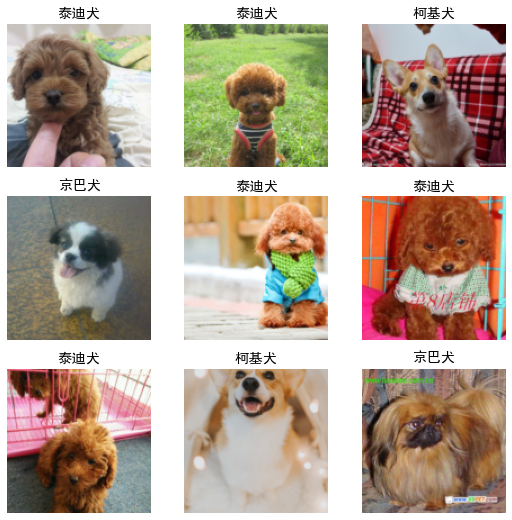

In [8]:
dogs.show_batch()

### 数据处理

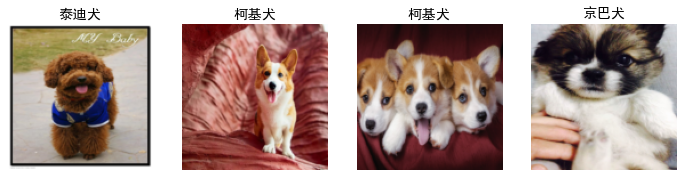

In [9]:
data = data.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = data.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

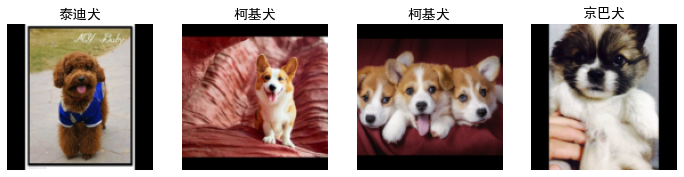

In [76]:
data = data.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = data.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

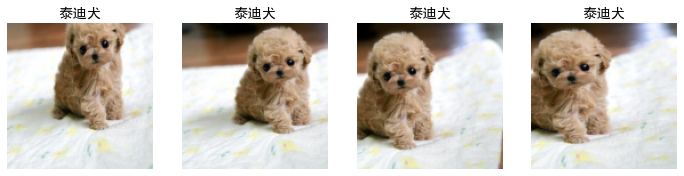

In [77]:
data = data.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = data.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

#### 数据增强

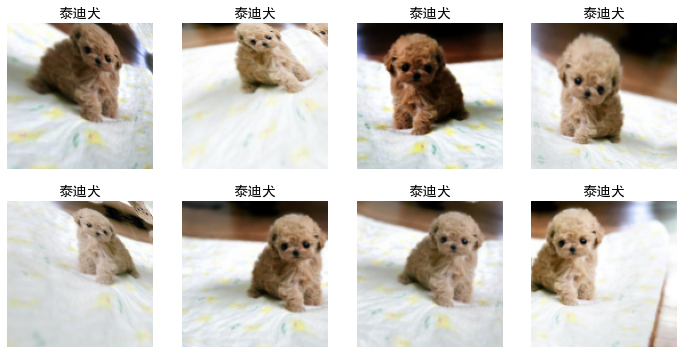

In [78]:
data = data.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = data.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Step 03. 成功的目标与评估指标

<div class="alert alert-block alert-warning">  
<b>知识回顾📕:</b> 

图像分类问题的评价指标是什么？
    
</div>

In [ ]:
accuracy??

In [32]:
f1_score = FBeta(average='macro', beta=1)

## Step 04. 确定基线快速建模

In [33]:
data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dogs = data.dataloaders(path)

In [34]:
dogs.vocab

(#3) ['京巴犬','柯基犬','泰迪犬']

In [35]:
dogs.dataset

(#310) [(PILImage mode=RGB size=500x322, TensorCategory(2)),(PILImage mode=RGB size=2448x3264, TensorCategory(0)),(PILImage mode=RGB size=1024x1024, TensorCategory(2)),(PILImage mode=RGB size=598x597, TensorCategory(1)),(PILImage mode=RGB size=576x360, TensorCategory(1)),(PILImage mode=RGB size=598x900, TensorCategory(2)),(PILImage mode=RGB size=1200x1200, TensorCategory(2)),(PILImage mode=RGB size=1332x888, TensorCategory(1)),(PILImage mode=RGB size=1280x800, TensorCategory(1)),(PILImage mode=RGB size=1024x683, TensorCategory(1))...]

In [36]:
learn = cnn_learner(dls, resnet18, metrics=[accuracy,f1_score])
learn.summary()

Sequential (Input shape: ['64 x 3 x 128 x 128'])
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               64 x 64 x 64 x 64    9,408      False     
________________________________________________________________
BatchNorm2d          64 x 64 x 64 x 64    128        True      
________________________________________________________________
ReLU                 64 x 64 x 64 x 64    0          False     
________________________________________________________________
MaxPool2d            64 x 64 x 32 x 32    0          False     
________________________________________________________________
Conv2d               64 x 64 x 32 x 32    36,864     False     
________________________________________________________________
BatchNorm2d          64 x 64 x 32 x 32    128        True      
________________________________________________________________
ReLU                 64 x 64 x 32 x 32    0          False     
_________________________________________________

In [37]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,1.501634,0.398902,0.857143,0.857946,00:04


epoch,train_loss,valid_loss,accuracy,fbeta_score,time
0,0.455852,0.141680,0.948052,0.948898,00:04
1,0.270536,0.174895,0.948052,0.948898,00:04
2,0.206097,0.152778,0.948052,0.948898,00:04
3,0.156351,0.123133,0.961039,0.961509,00:04


### 训练结果分析

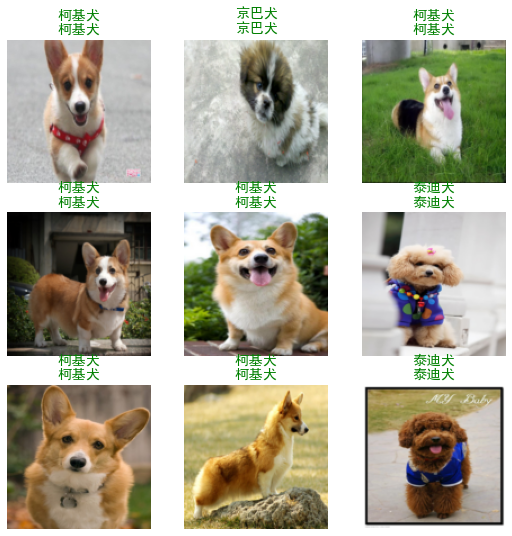

In [38]:
learn.show_results()

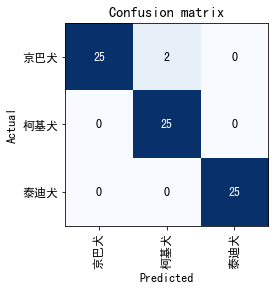

In [83]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

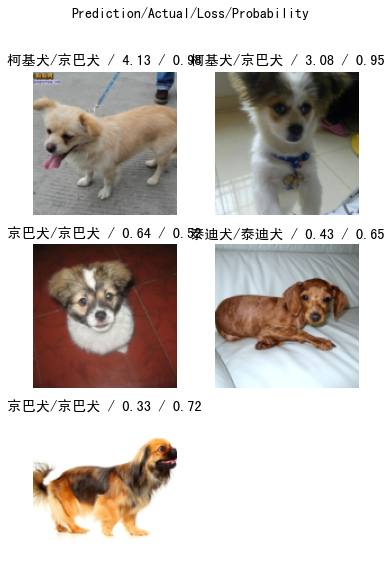

In [86]:
interp.plot_top_losses(5, nrows=3)

In [87]:
interp.most_confused()

[('京巴犬', '柯基犬', 2)]

### Next

> 数据清理 + 获得更多的数据

In [55]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [56]:
#hide
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

We can see that amongst our "black bears" is an image that contains two bears: one grizzly, one black. So, we should choose `<Delete>` in the menu under this image. `ImageClassifierCleaner` doesn't actually do the deleting or changing of labels for you; it just returns the indices of items to change. So, for instance, to delete (`unlink`) all images selected for deletion, we would run:

```python
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
```

To move images for which we've selected a different category, we would run:

```python
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
```

> s: Cleaning the data and getting it ready for your model are two of the biggest challenges for data scientists; they say it takes 90% of their time. The fastai library aims to provide tools that make it as easy as possible.

We'll be seeing more examples of model-driven data cleaning throughout this book. Once we've cleaned up our data, we can retrain our model. Try it yourself, and see if your accuracy improves!

<div class="alert alert-block alert-danger">  
<b>重要📌</b>
    
No Need for Big Data: After cleaning the dataset using these steps, we generally are seeing 100% accuracy on this task. We even see that result when we download a lot fewer images than the 150 per class we're using here. As you can see, the common complaint that you need massive amounts of data to do deep learning can be a very long way from the truth!
</div>

## Step 05. 模型部署与上线

> 尝试将训练好的模型转变成一个在线的web服务

In [77]:
learn.export()

In [79]:
!ls *.pkl

export.pkl


In [15]:
learn_inf = load_learner('export.pkl')

In [4]:
learn_inf.predict('Teddy_Dog.jpg')

('Teddy', tensor(2), tensor([3.9374e-04, 1.5317e-02, 9.8429e-01]))

In [5]:
learn_inf.dls.vocab

(#3) ['Huskies','Pekingese','Teddy']

### 编写一个简单的GUI

> TBD: Need some explanation for details of the steps

In [7]:
from ipywidgets import widgets

In [8]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [12]:
test = PILImage.create(btn_upload.data[-1])

In [13]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(test.to_thumb(128,128))
out_pl

Output()

In [16]:
pred,pred_idx,probs = learn_inf.predict(test)

In [19]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Result: {pred}; Pro: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Result: Pekingese; Pro: 0.9993')

In [20]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [24]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Result: {pred}; Pro: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

You can test the button now by pressing it, and you should see the image and predictions update automatically!

We can now put them all in a vertical box (VBox) to complete our GUI:

In [22]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [26]:
#hide_output
VBox([widgets.Label('上传一张图片!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

### 部署你的应用

<div class="alert alert-block alert-success">  
概要✅：

此部分我们将通过最少的代码改动，将我们前面训练完成的模型部署为一个Web应用，并可以依托免费的服务承载你的人工智能应用，这样就可以分享给大家来使用了。
</div>

#### Voila

<div class="alert alert-block alert-success">  
概要✅：

voila是一个可以将Jupyter Notebook快速转变成web app的工具，更多内容参见[Github](https://github.com/voila-dashboards/voila)
</div>

新建一个Notebook，完成web应用的开发~

#### Binder 

TBD: make a read me file for this part: step by step

As we're writing this book in early 2020 the simplest (and free!) approach is to use [Binder](https://mybinder.org/). To publish your web app on Binder, you follow these steps:

1. Add your notebook to a [GitHub repository](http://github.com/).
2. Paste the URL of that repo into Binder's URL, as shown in <<deploy-binder>>.
3. Change the File dropdown to instead select URL.
4. In the "URL to open" field, enter `/voila/render/02_web_app.ipynb` (replacing `name` with the name of for your notebook).
5. Click the clickboard button at the bottom right to copyt the URL and paste it somewhere safe. 
6. Click Launch.

![](imgs/binder.png)

<div class="alert alert-block alert-info">
<b>提示💡:</b> 

还有一款常用的工具叫做`streamlit`，同样可以快速开发原型
</div>

## Step 06. 其它要考虑的问题

<div class="alert alert-block alert-info">
<b>值得思考的内容💡:</b> 

> 很多值得思考的内容，在此罗列

1. 持续迭代，持续收集数据；
2. 环境因素的考量；
3. 是否需要多个模型？
4. 部署位置
</div>

### 作业

<div class="alert alert-block alert-success">  
👍挑战一下自己👍：

1. 通过对数据进行优化及预处理，迭代模型，能够提升模型的检测结果？
2. 大胆Share你的模型
3. 再选一种或两种狗的类别，增加到数据集中，看是否可以获得理想中的结果？ 
</div>

# 环境准备及测试

1. docker image 的制作

```shell
## voila
pip install voila
jupyter serverextension enable voila --sys-prefix

## jupyter extension
pip install jupyter_nbextensions_configurator jupyter_contrib_nbextensions

jupyter contrib nbextension install --user

jupyter nbextensions_configurator enable --user
```
2. 网络联通性测试
3. 预训练模型和数据集准备
4. 其它bug测试
5. 和李方老师协调实训平台的资源